# sector 6

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,7]

## Import Data

In [2]:
# data = get_output('../combined_dataframe.txt')
# data.head()

In [3]:
data = get_output('../output_log/s6.txt')
length = len(data)

- Change path to storage

In [4]:
data = data[data.transit_prob == 'maybeTransit']
data['abs_path'] = data['path'].str.replace('/tmp/tess/', '/storage/astro2/phrdhx/tesslcs/')
print(len(data), f"after maybeTransit, {len(data)/length *100}% candidates remain")
data.head()

305366 after maybeTransit, 48.914831622298294% candidates remain


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path
18,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,130415294,-4.71360,-3.86310,1481.78372,1.00631,0.00058,0.52952,1.87944,1.82709,...,48.60723,48.19034,0.60759,0.60238,0.00032,0.00032,0.00026,0.00026,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
19,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,100612127,-4.92376,-3.27376,1487.36797,1.03506,0.00009,0.22045,5.49405,6.69849,...,383.46966,368.58245,5.63926,5.42033,0.00016,0.00016,0.00013,0.00013,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
20,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,156713349,-6.00725,-3.98432,1487.57638,0.91723,0.00000,555.27169,-29.85083,0.00000,...,150.73671,164.08856,0.80179,0.87281,0.00070,0.00073,0.00056,0.00059,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
21,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,177308816,-29.63374,-11.92862,1483.01027,1.00296,0.00319,0.06607,-0.54468,0.69704,...,187.96356,187.40187,3.75927,3.74804,0.00070,0.00070,0.00053,0.00053,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...
23,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,220599591,-12.65260,-2.58441,1486.20039,0.75177,0.00000,607.25242,-29.99724,0.00000,...,85647.76723,114695.05620,314.88150,421.67300,0.01757,0.02027,0.01353,0.01676,maybeTransit,/storage/astro2/phrdhx/tesslcs/tesslcs_sector_...


## Removing worst anomalies

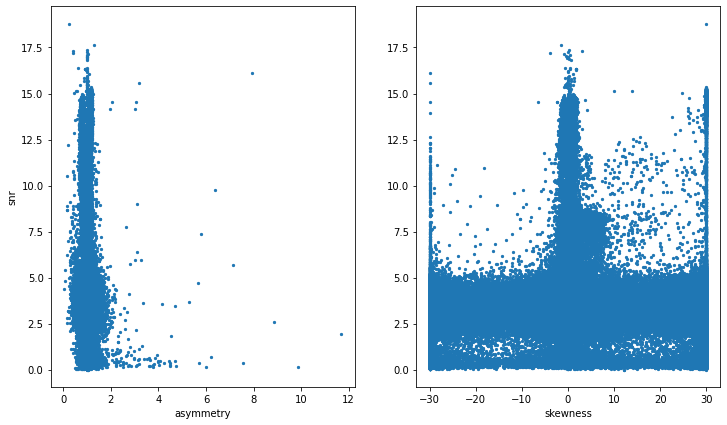

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3)].reset_index(drop=True)

---

### Some EDA

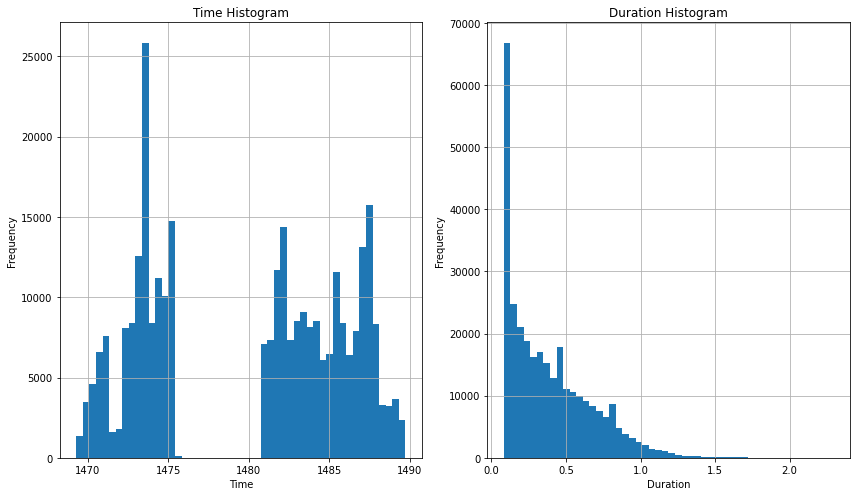

In [7]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

## SNR cut

In [8]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)
len(data_new)

29629

## Duration cut

In [9]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

## Depth cut

In [10]:
data_new['abs_depth'] = abs(data_new.depth)

In [11]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

---

## Remaining Candidates

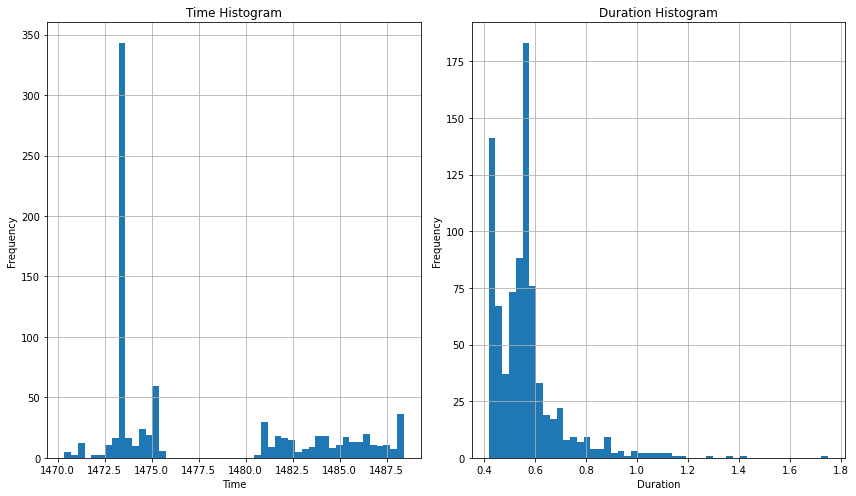

In [13]:
fig, axes = plt.subplots(1, 2)

# Plot the histogram for 'time' in the first subplot
data_new['time'].hist(bins=50, ax=axes[0])
axes[0].set_title('Time Histogram')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')

# Plot the histogram for 'duration' in the second subplot
data_new['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('Duration Histogram')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the subplots
plt.show()

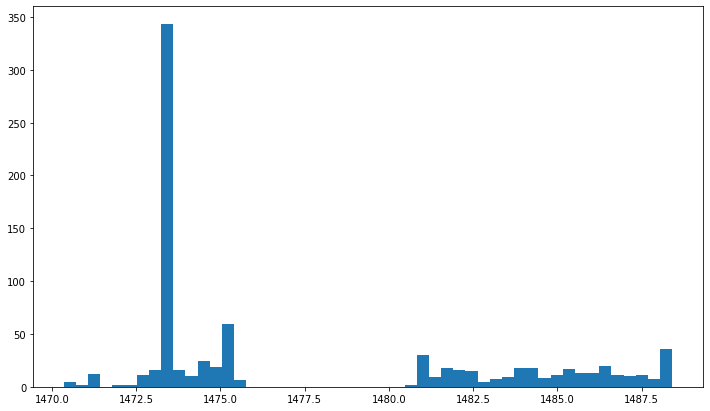

In [14]:
hist_values, bin_edges, _ = plt.hist(data_new['time'], bins=50)
#duration_hist_values, duration_bin_edges, _ = plt.hist(data_new['duration'], bins=50)

# Find the index of the bin with the maximum count
max_bin_index = np.argmax(hist_values)

# Retrieve the bin count and bin edges for the bin with the most count
max_bin_count = hist_values[max_bin_index]
bin_left_edge = bin_edges[max_bin_index]
bin_right_edge = bin_edges[max_bin_index + 1]

In [15]:
hist_values

array([  5.,   2.,  12.,   0.,   2.,   2.,  11.,  16., 343.,  16.,  10.,
        24.,  19.,  59.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   2.,  30.,   9.,  18.,  16.,
        15.,   5.,   7.,   9.,  18.,  18.,   8.,  11.,  17.,  13.,  13.,
        20.,  11.,  10.,  11.,   7.,  36.])

In [16]:
# # Filter the DataFrame for data within the specified time bin
# subset_data = data_new[(data_new['time'] >= bin_left_edge) ]

# # Calculate the histogram for the 'duration' column within the time bin
# duration_hist_values, duration_bin_edges = np.histogram(subset_data['duration'], bins=50)

# max_duration_bin_index = np.argmax(duration_hist_values)

# # Retrieve the bin count and bin edges for the most common duration bin within the time bin
# max_duration_bin_count = duration_hist_values[max_duration_bin_index]
# duration_bin_left_edge = duration_bin_edges[max_duration_bin_index]
# duration_bin_right_edge = duration_bin_edges[max_duration_bin_index + 1]

# plt.hist(subset_data['duration'], bins=10, alpha=0.7)  # Adjust color and alpha as desired
# plt.show()

In [17]:
print(bin_left_edge, "start of bin")
print(bin_right_edge, "end of bin")
print(max_bin_count, "number of lcs")

1473.2365028 start of bin
1473.5977994 end of bin
343.0 number of lcs


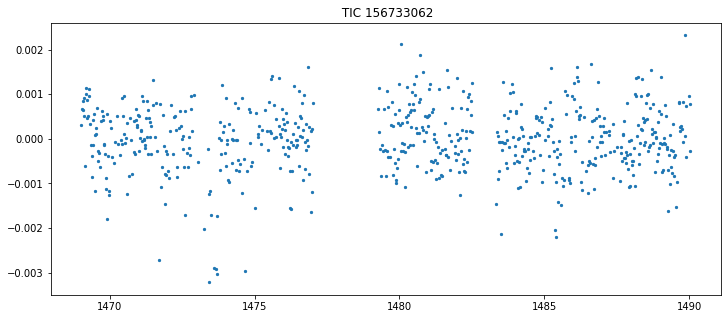

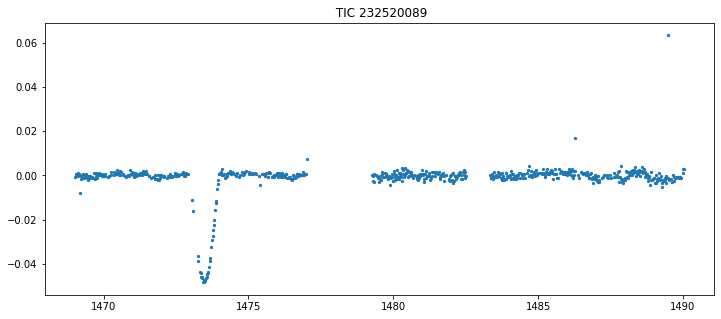

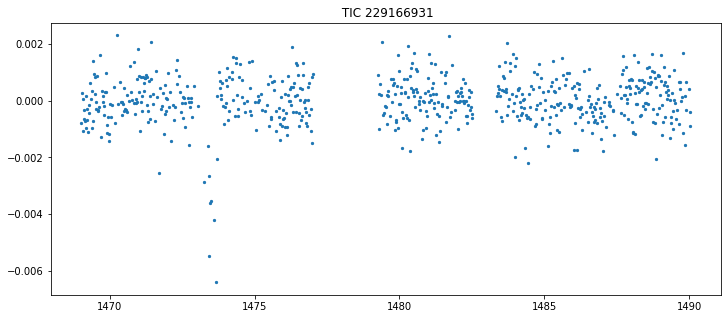

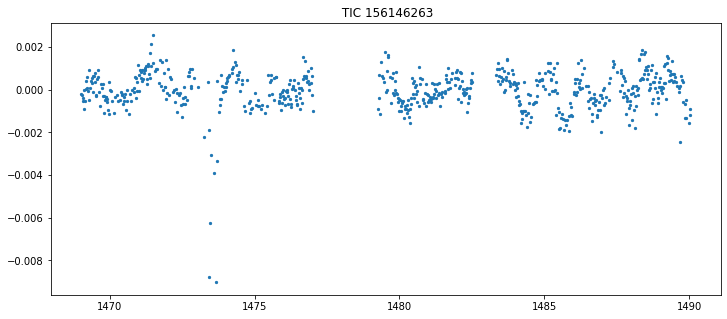

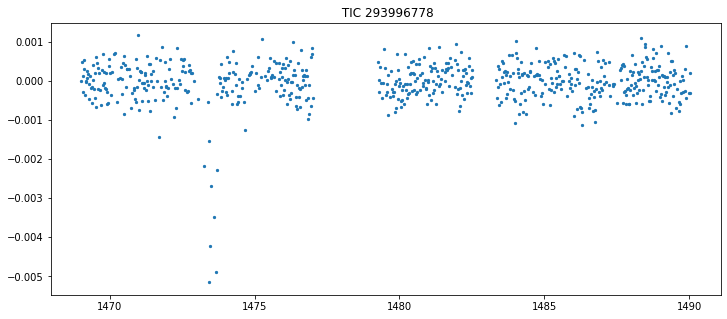

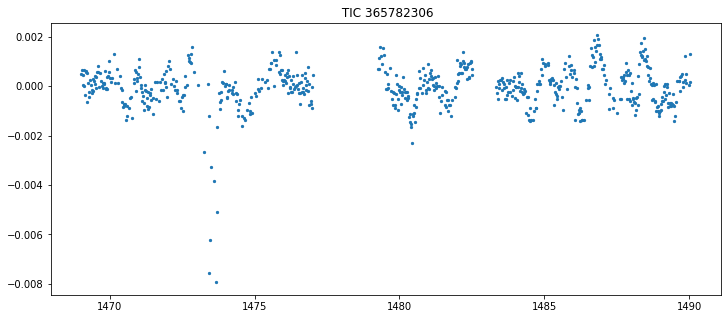

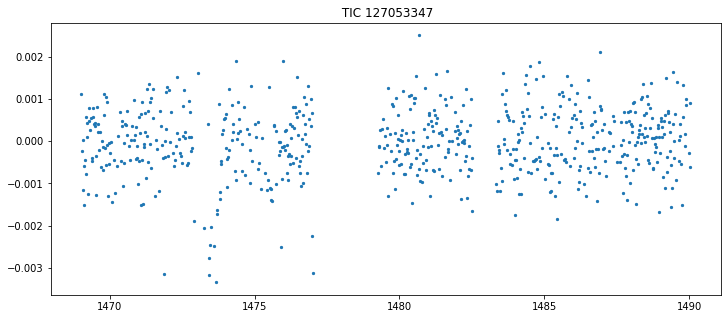

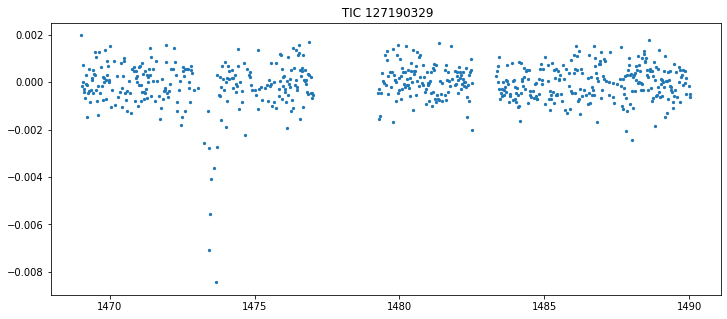

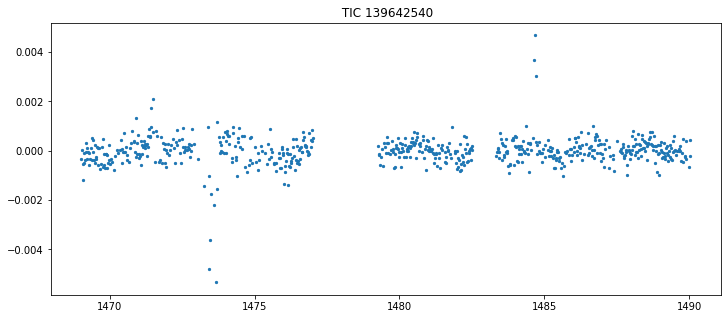

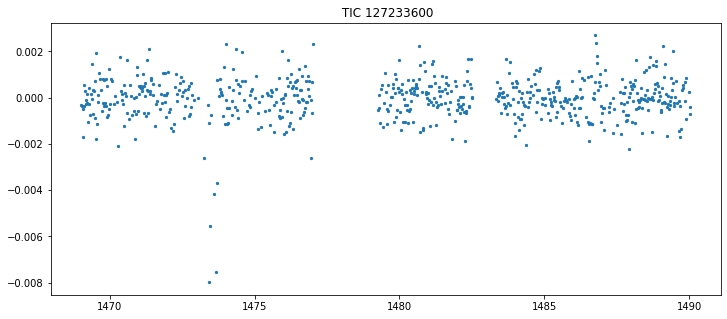

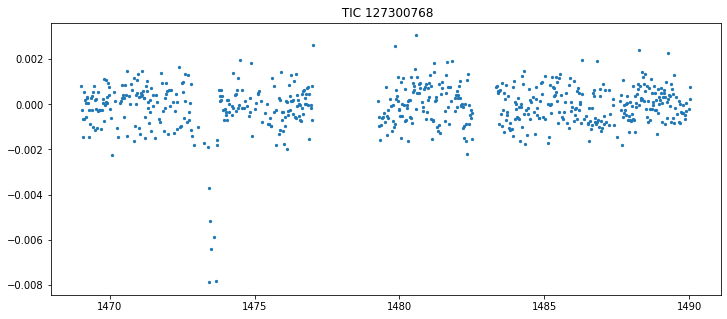

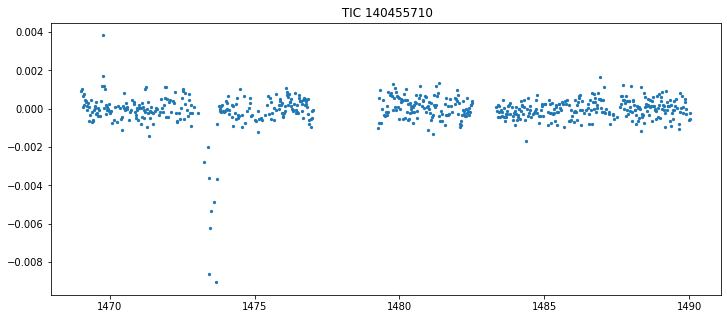

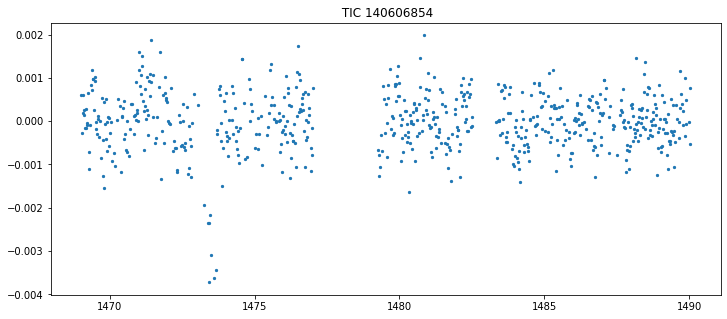

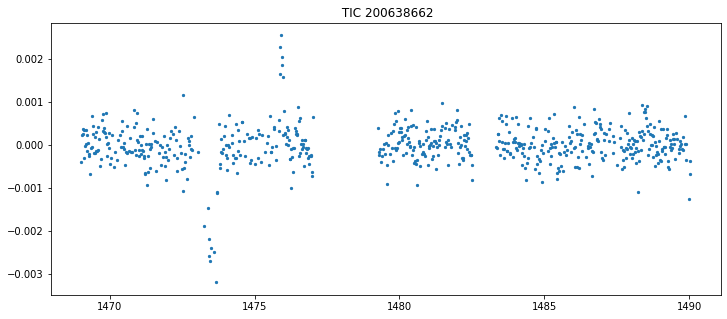

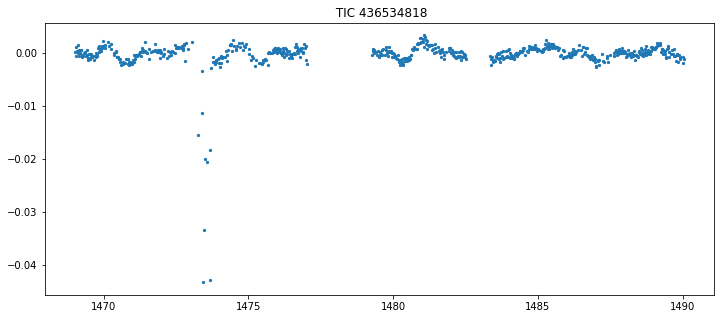

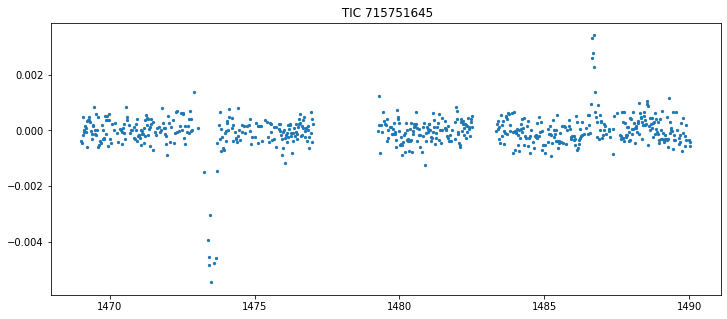

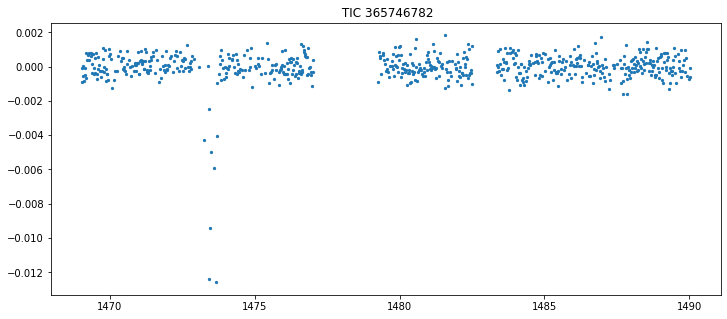

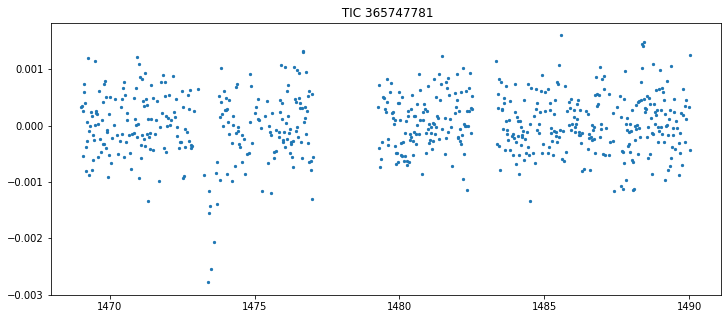

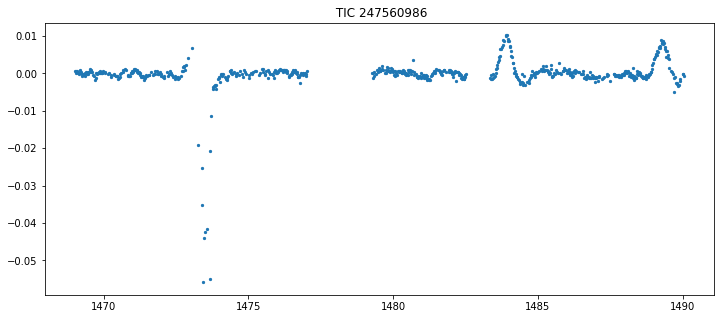

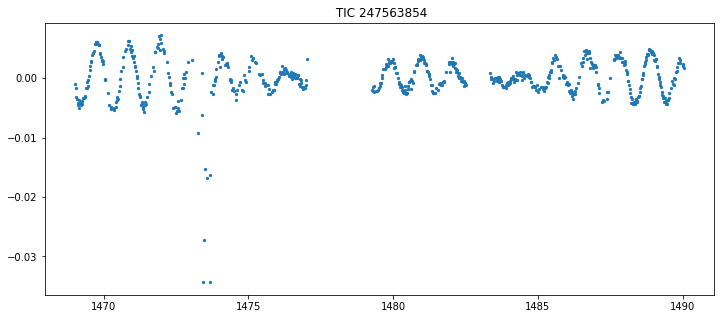

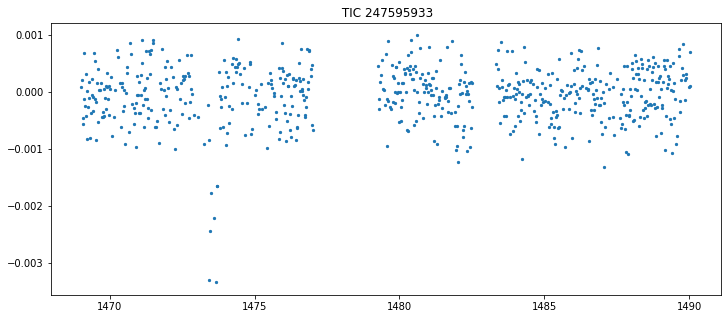

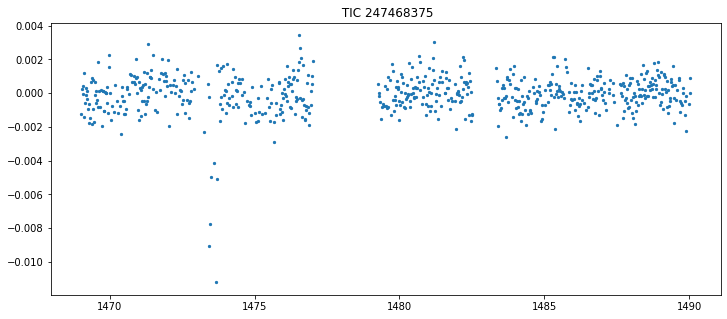

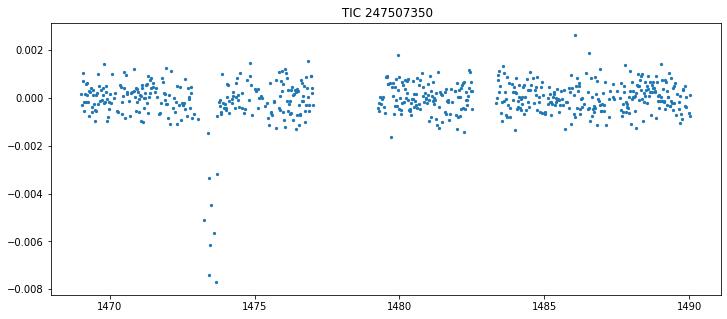

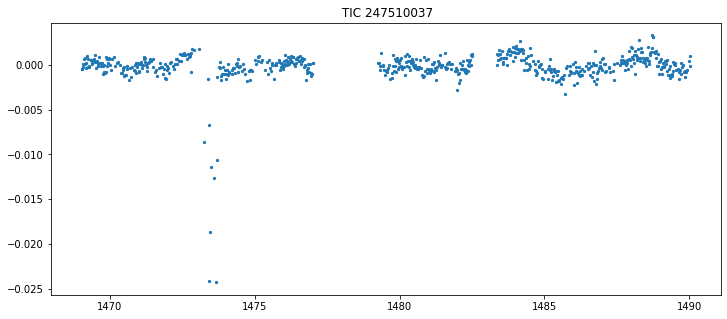

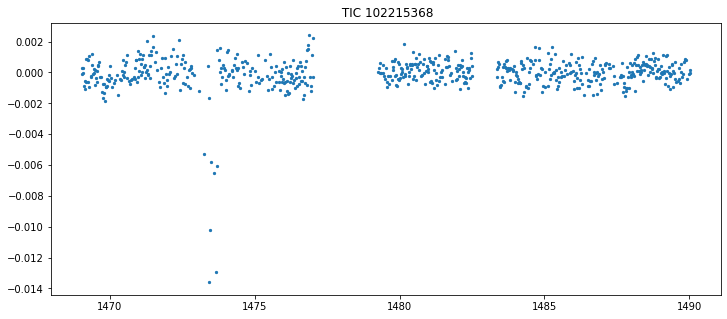

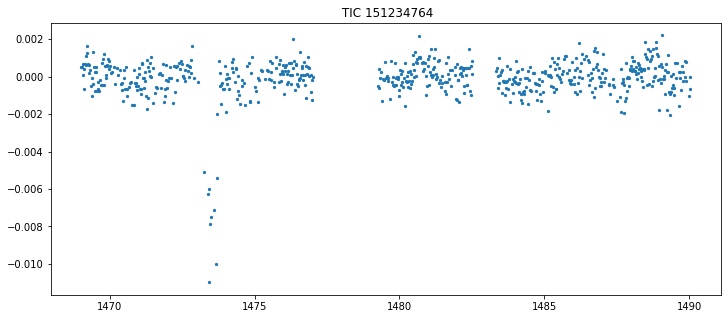

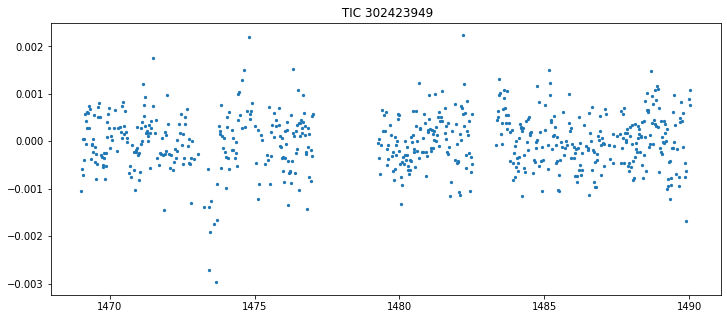

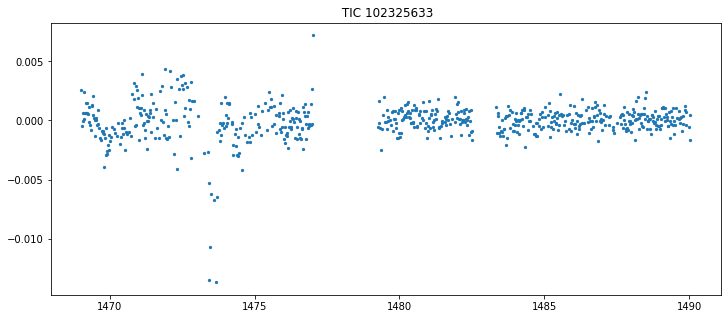

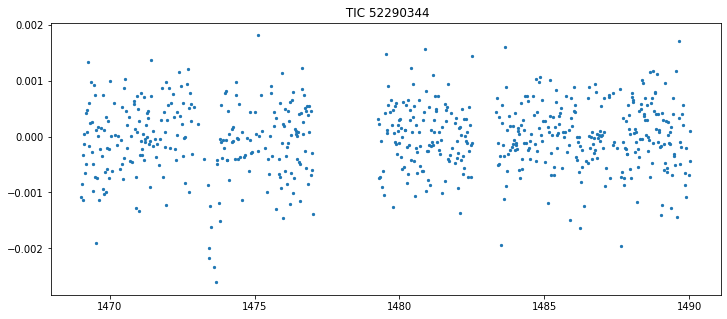

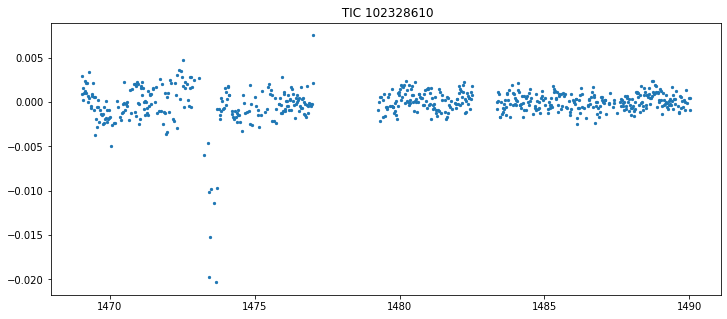

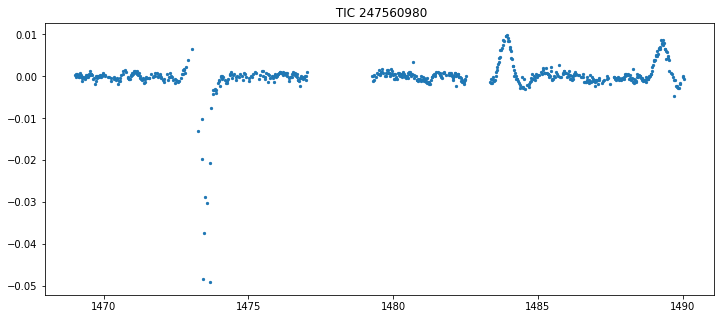

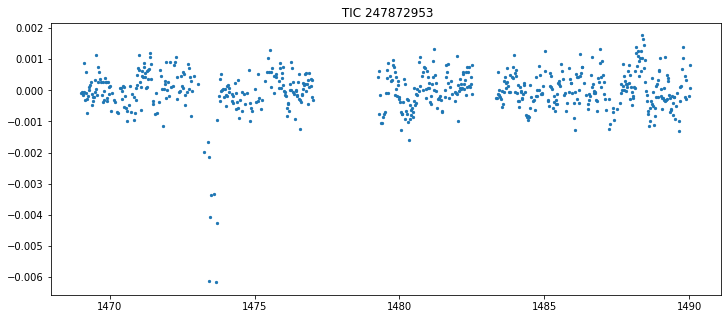

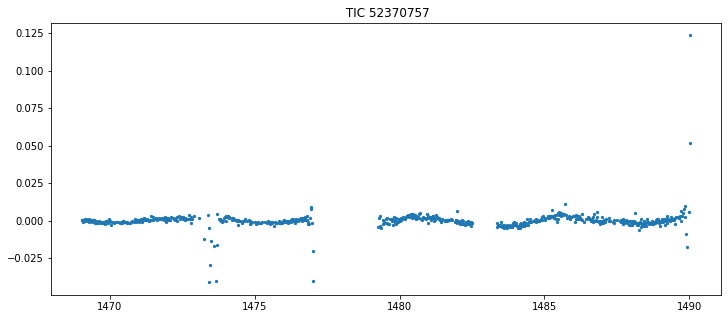

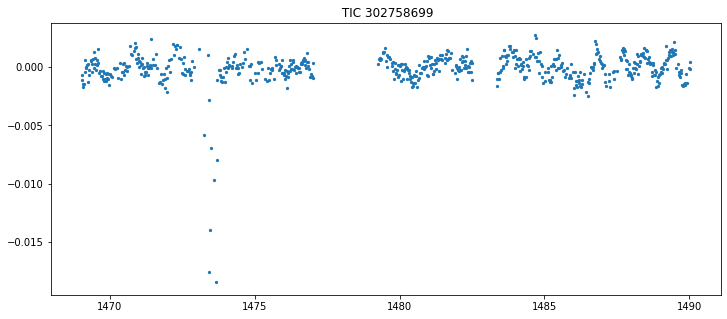

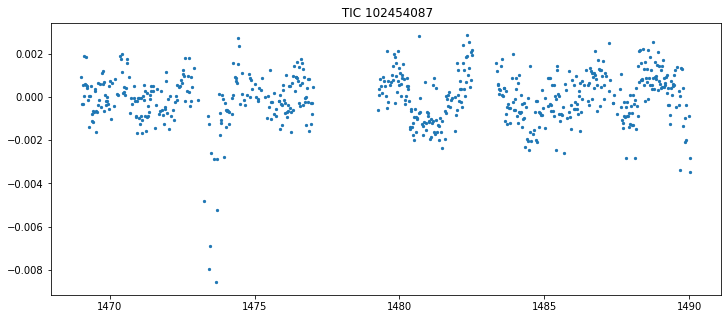

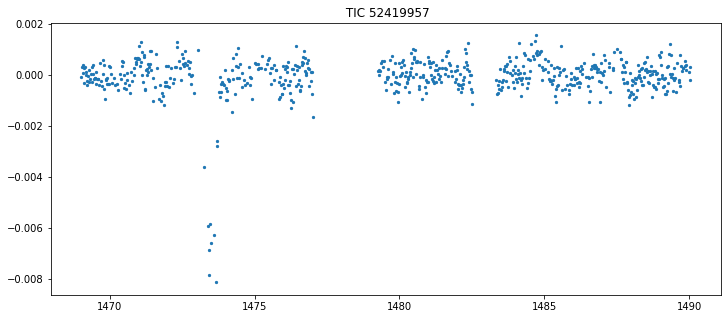

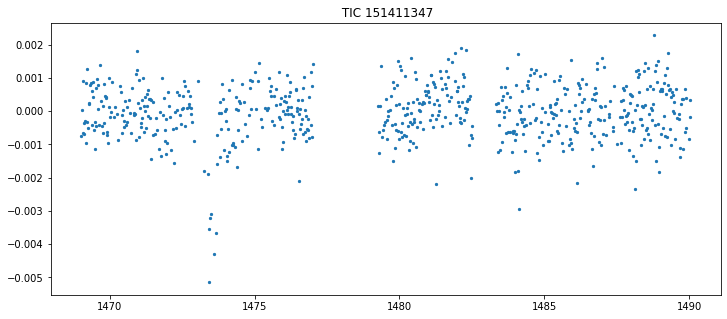

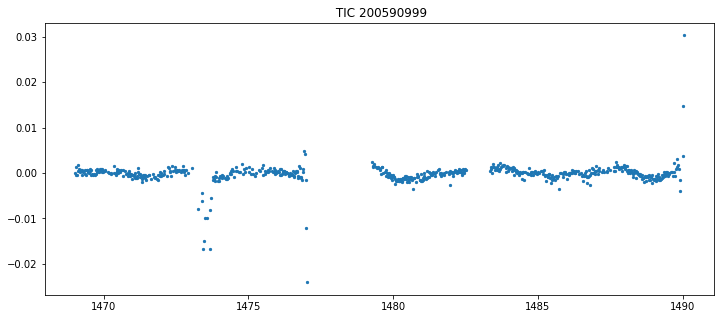

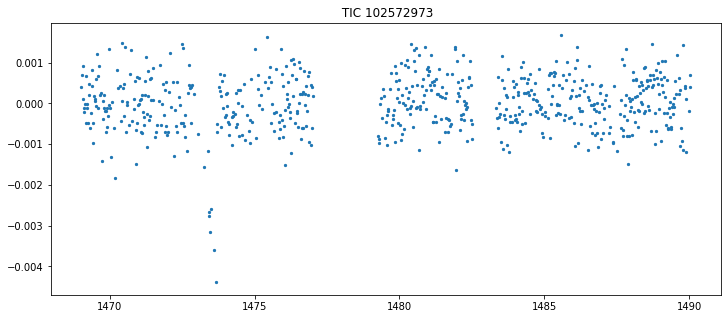

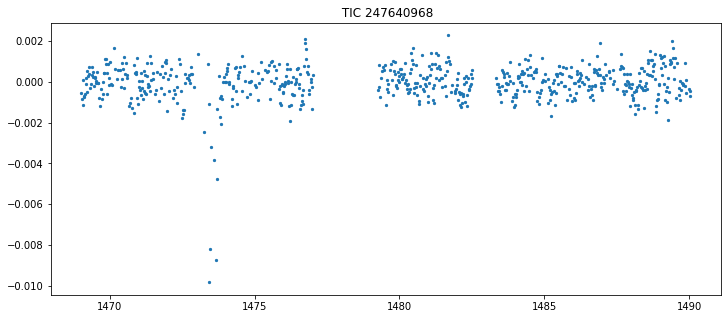

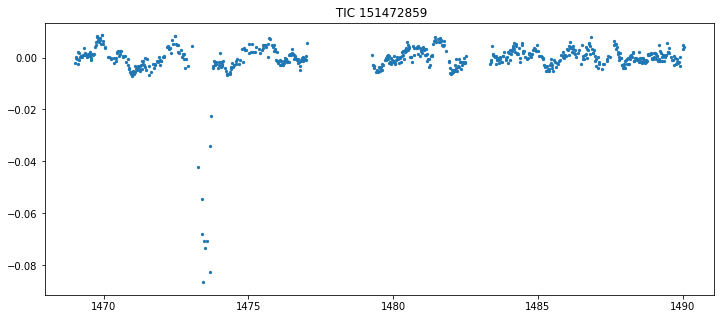

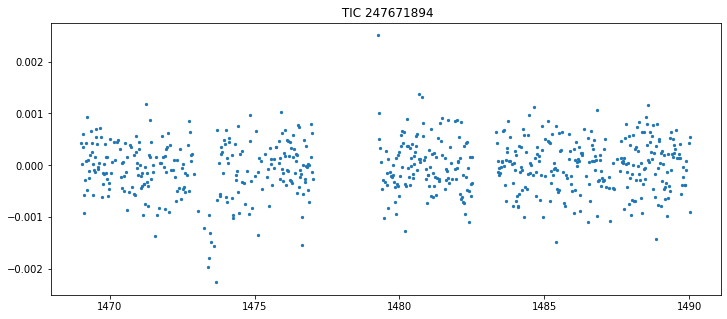

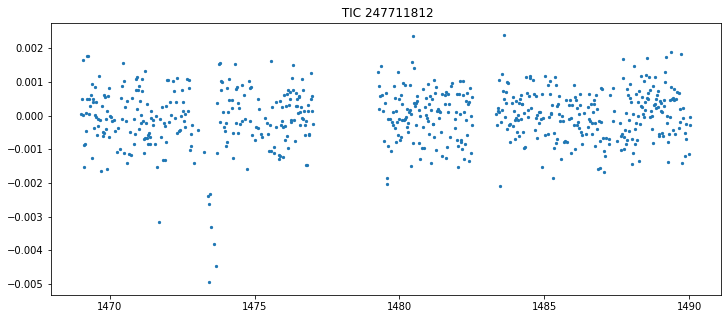

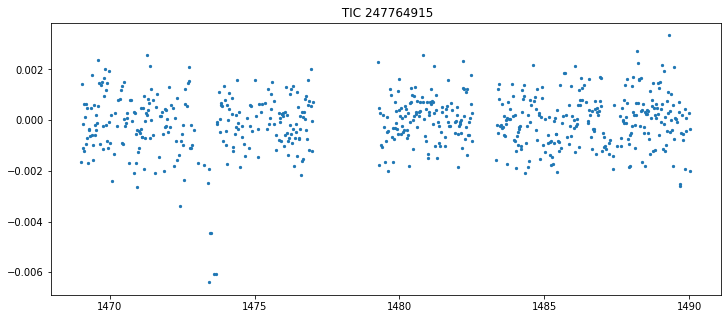

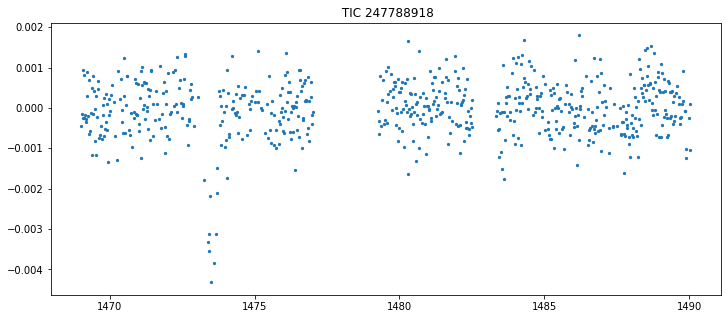

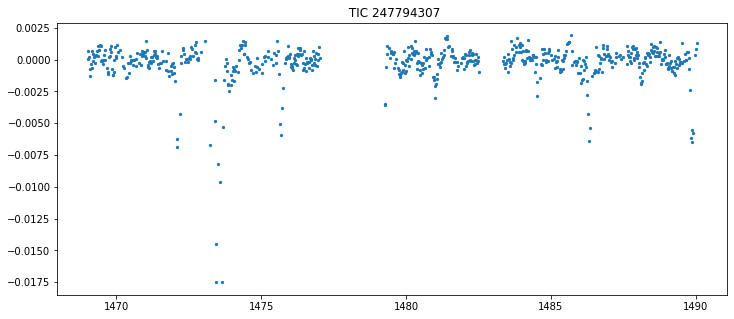

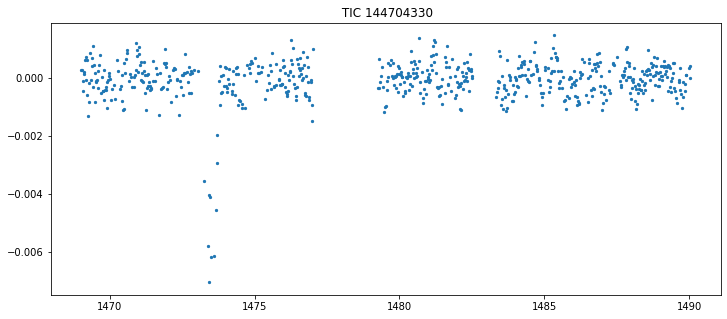

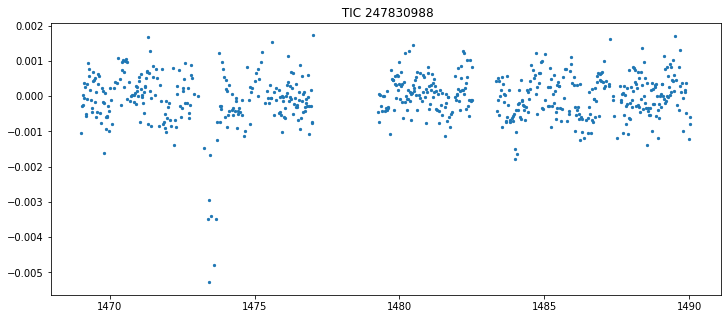

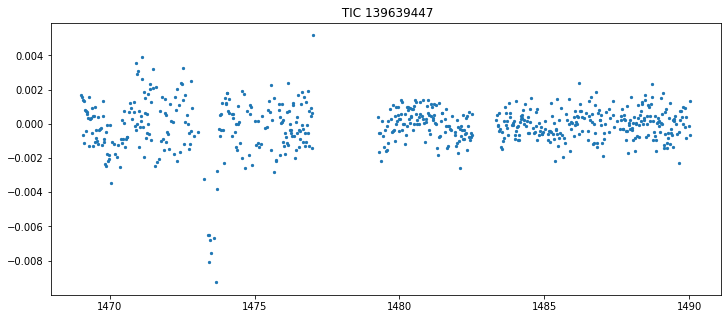

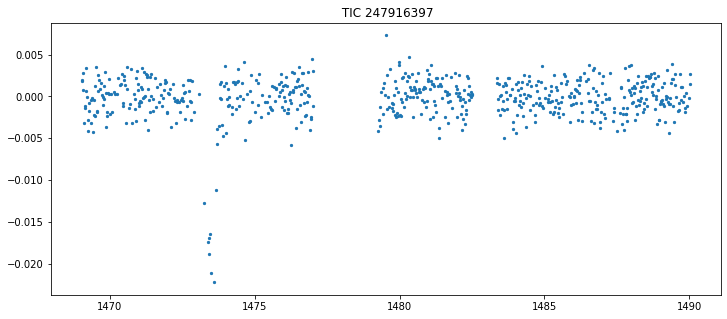

In [24]:
tic_ids = []
for i in data_new[(data_new.time >= bin_left_edge) & (data_new.time <= bin_right_edge)].abs_path.head(50): #4 x 4 grid for illustration purposes
    tic_ids.append(i.split('_')[-1].split('.')[0])
    lc, lc_info = import_XRPlightcurve(i,sector=1)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()